In [1]:
PATH = '../input/cassava-leaf-disease-classification'

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
import matplotlib.image as mpimg

In [3]:
train_set = pd.read_csv(f'{PATH}/train.csv')
train_set = pd.read_csv(f'{PATH}/train.csv')

train_set.head(2)

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3


In [4]:
json_mapping = {"0": "Cassava Bacterial Blight (CBB)", "1": "Cassava Brown Streak Disease (CBSD)", "2": "Cassava Green Mottle (CGM)", "3": "Cassava Mosaic Disease (CMD)", "4": "Healthy"}


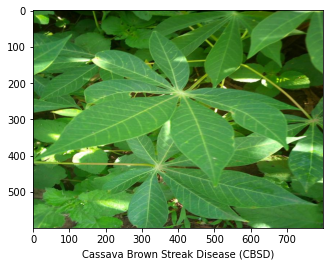

In [5]:
images_array = [x for x in os.listdir(f'{PATH}/train_images')]

def imshow(position: int):
    image_id, category = train_set.iloc[position]
    label = json_mapping.get(f"{category}")
    image_path = f'{PATH}/train_images/{image_id}'
    img = mpimg.imread(image_path)
    plt.xlabel(label)
    plt.imshow(img)

imshow(2)

In [6]:
# the dataset is skewed towards label 3
train_set.label.value_counts()

3    13158
4     2577
2     2386
1     2189
0     1087
Name: label, dtype: int64

In [7]:
kFold = model_selection.StratifiedKFold(n_splits=5)

for f, (t_, v_) in enumerate(kFold.split(X=train_set, y=train_set.label)):
    train_set.loc[v_, 'kFold'] = f
train_set.reset_index(drop=True, inplace=True)

In [8]:
!ls

03_extra_data_sensioai.ipynb  exploration.ipynb  extra_data_adding.ipynb


In [9]:
train_csv = pd.read_csv(f"{PATH}/train.csv")
        # adding a column for image location
train_csv['path'] = train_csv['image_id'].map(
            lambda x: f"{PATH}/'train_images/{x}")
        # shuffling and reset index
print(train_csv.columns)
train_csv.drop('image_id', axis=1,inplace=True)
train_csv = train_csv.sample(frac=1).reset_index(drop=True)
train_csv.head()

Index(['image_id', 'label', 'path'], dtype='object')


,label,path
0,1,../input/cassava-leaf-disease-classification/'...
1,1,../input/cassava-leaf-disease-classification/'...
2,3,../input/cassava-leaf-disease-classification/'...
3,3,../input/cassava-leaf-disease-classification/'...
4,1,../input/cassava-leaf-disease-classification/'...


In [12]:
print(train_csv.columns)
print(train_csv.iloc[0])

Index(['label', 'path'], dtype='object')
label                                                    1
path     ../input/cassava-leaf-disease-classification/'...
Name: 0, dtype: object


In [161]:
kFold = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for f, (t_, v_) in enumerate(kFold.split(X=train_csv, y=train_csv.label)):
    train_csv.loc[v_, 'kFold'] = f

In [162]:
train_cov = train_csv.groupby('label').apply(
            lambda x: x.sample(frac=0.1)).reset_index(drop=True)
df1 = train_cov[train_csv['kFold'] == 4]
df2 = train_cov[train_csv['kFold'] != 4]

df1 = df1.sample(frac=0.1).reset_index(drop=True)

In [163]:
df1.label.value_counts()

3    25
4     5
1     5
2     3
0     2
Name: label, dtype: int64

In [107]:
# df1.sample(frac=1).reset_index(drop=True)
df1.iloc[0, 1]

"../input/cassava-leaf-disease-classification/'train_images/217461618.jpg"

In [67]:
from PIL import Image
from PIL import ImageFile
import numpy as np
import torch

image_path = df1.loc[5]['path']
img = "../input/cassava-leaf-disease-classification/train_images/6103.jpg"

image = Image.open(img) 
image = np.array(image) 
image = torch.tensor(image)
print(2, image)

2 tensor([[[110, 121,  81],
         [ 98, 111,  68],
         [100, 113,  67],
         ...,
         [ 68,  54,  67],
         [ 67,  55,  65],
         [ 61,  49,  59]],

        [[122, 138,  91],
         [134, 150, 101],
         [156, 175, 120],
         ...,
         [ 68,  55,  65],
         [ 67,  54,  63],
         [ 62,  49,  58]],

        [[166, 192, 127],
         [169, 195, 130],
         [168, 195, 126],
         ...,
         [ 70,  53,  61],
         [ 69,  52,  58],
         [ 64,  49,  52]],

        ...,

        [[ 99,  75, 101],
         [ 99,  75, 101],
         [ 98,  74, 100],
         ...,
         [ 79,  62,  81],
         [ 82,  64,  90],
         [ 84,  65,  93]],

        [[ 97,  72, 101],
         [ 99,  74, 103],
         [ 99,  74, 103],
         ...,
         [ 75,  57,  79],
         [ 75,  56,  84],
         [ 76,  57,  87]],

        [[ 99,  74, 103],
         [101,  76, 105],
         [101,  76, 105],
         ...,
         [ 66,  48,  70],
      

In [54]:
!ls "../input/cassava-leaf-disease-classification/'train_images"

ls: impossible d'accéder à "../input/cassava-leaf-disease-classification/'train_images": Aucun fichier ou dossier de ce type


In [63]:
!pip3 install torch

  Using cached torch-1.7.0-cp38-cp38-manylinux1_x86_64.whl (776.8 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached dataclasses-0.6-py3-none-any.whl (14 kB)


In [19]:
y = train_set['label']
y[4]

3

In [2]:
import datetime, os

In [5]:
today = str(datetime.date.today())
print(today)

2020-12-20


In [10]:
PATHO = f'../output/checkpoints/{today}'

if not os.path.exists(PATHO):
    os.mkdir(PATHO)